In [1]:
from ngsildclient import Client

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node("toto")
G.add_node("nimp")
G.add_edge("toto", "nimp")

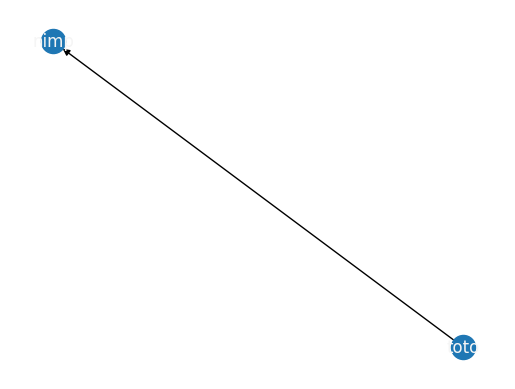

In [3]:
plt.tight_layout()
plt.axis("off")
nx.draw_networkx(G, node_color="tab:blue", font_color="whitesmoke")

In [4]:
import d3graph

In [2]:
d3graph.d3graph.edges2G(G)

AttributeError: type object 'd3graph' has no attribute 'edges2G'

In [5]:
adjmat = G.adjacency()

In [9]:
adjmat

In [13]:
from d3graph import d3graph

In [6]:
d3 = d3graph()

TypeError: 'module' object is not callable

In [17]:
d3.graph(adjmat)

AttributeError: 'dict_itemiterator' object has no attribute 'copy'

In [7]:
from d3graph import d3graph, vec2adjmat

# Create example network
source = ['node A','node F','node B','node B','node B','node A','node C','node Z']
target = ['node F','node B','node J','node F','node F','node M','node M','node A']
weight = [5.56, 0.5, 0.64, 0.23, 0.9, 3.28, 0.5, 0.45]
# Convert to adjacency matrix
adjmat = vec2adjmat(source, target, weight=weight)

# Initialize
d3 = d3graph()
# Proces adjmat
d3.graph(adjmat)
# Plot
d3.show()


In [1]:
from ngsildclient import Client
client = Client(port=8026, port_temporal=8027)
root = client.get("A:A1")

Failed to connect to Context Broker at localhost:8026


NgsiApiError: Error while requesting the broker API

In [10]:
from ngsildclient import Entity
a1 = Entity("A", "A1")
b1 = Entity("B", "B1")
c1 = Entity("C", "C1")
d1 = Entity("D", "D1")
d2 = Entity("D", "D2")
a1.rel("hasB", b1)
a1.rel("hasD", [d1, d2])
b1.rel("hasC", c1)
c1.rel("hasA", a1) 

{'@context': ['https://uri.etsi.org/ngsi-ld/v1/ngsi-ld-core-context.jsonld'], 'id': 'urn:ngsi-ld:C:C1', 'type': 'C', 'hasA': {'type': 'Relationship', 'object': 'urn:ngsi-ld:A:A1'}}

In [10]:
client = Client(port=8026)

Failed to connect to Context Broker at localhost:8026


In [11]:
client.upsert([a1, b1, c1, d1, d2])

NameError: name 'a1' is not defined

In [ ]:
from ngsildclient import Client, Entity
client = Client(port=8026)
rooms = client.query("RoomObserved")

Connected to Context Broker at localhost:8026 | vendor=Orion-LD | version=1.0.1-PRE-468


In [ ]:
from typing import List
def rooms_to_dfdict(rooms: List[Entity]):
    room, pressure, temp = [], [], []
    for r in rooms:
        room.append(r.id.rsplit(":")[-1])
        pressure.append(r["pressure.value"])
        temp.append(r["temperature.value"])
    return {"room": room, "pressure": pressure, "temperature": temp}


In [ ]:
import pandas as pd
d = rooms_to_dfdict(rooms)
df = pd.DataFrame(d)


In [ ]:
import plotly.express as px
fig = px.bar(df, x="room", y="temperature", color="pressure")
fig.show()

In [ ]:
client.close()

In [ ]:
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 389.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Using cached pyrsistent-0.18.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (115 kB)


In [32]:
from ngsildclient import Client
client = Client()
root = client.get("A:A1")
G = client.network(root)

Connected to Context Broker at localhost:1026 | vendor=Orion-LD | version=post-v1.1.0


In [33]:
import networkx as nx
import plotly.graph_objects as go

# select layout
pos: dict = nx.spring_layout(G)

# set node positions
node_x = []
node_y = []
node_text = []
node_color = []
for node in G.nodes():
    x, y = G.nodes[node]["pos"]= pos[node]
    node_x.append(x)
    node_y.append(y)
    print(node)
    type, shortid = node
    node_text.append(shortid)
    node_color.append(hash(type))
print(node_text)
print(node_color)


('A', 'A:A1')
('B', 'B:B1')
('C', 'C:C1')
('D', 'D:D29')
('D', 'D:D1')
('D', 'D:D2')
('D', 'D:D3')
('D', 'D:D4')
('D', 'D:D5')
('D', 'D:D6')
('D', 'D:D7')
('D', 'D:D8')
('D', 'D:D9')
('D', 'D:D10')
('D', 'D:D11')
('D', 'D:D12')
('D', 'D:D13')
('D', 'D:D14')
('D', 'D:D15')
('D', 'D:D16')
('D', 'D:D17')
('D', 'D:D18')
('D', 'D:D19')
('D', 'D:D20')
('D', 'D:D21')
('D', 'D:D22')
('D', 'D:D23')
('D', 'D:D24')
('D', 'D:D25')
('D', 'D:D26')
('D', 'D:D27')
('D', 'D:D28')
['A:A1', 'B:B1', 'C:C1', 'D:D29', 'D:D1', 'D:D2', 'D:D3', 'D:D4', 'D:D5', 'D:D6', 'D:D7', 'D:D8', 'D:D9', 'D:D10', 'D:D11', 'D:D12', 'D:D13', 'D:D14', 'D:D15', 'D:D16', 'D:D17', 'D:D18', 'D:D19', 'D:D20', 'D:D21', 'D:D22', 'D:D23', 'D:D24', 'D:D25', 'D:D26', 'D:D27', 'D:D28']
[48279975616140827, -6309030513232154770, -2169167007217827094, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 4208563288990410857, 42

In [34]:
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        #showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        line_width=2))
node_trace.text = node_text
node_trace.marker.color = node_color

In [35]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [36]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Entities network graph",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()